# Theis (1935) constant head boundary model
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pumping test in a confined aquifer with the Theis (1941) constant head boundary model.

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

The data set for this example has been provided by: 
G. de Marsily, cours DEA Paris 6, "Aquifère cétier de Nefza, Tunisie".
Piezometer A3Bis

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management. 


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data

The diagnostic plot shows a behavior that indicates a possible constant head boundary effect.

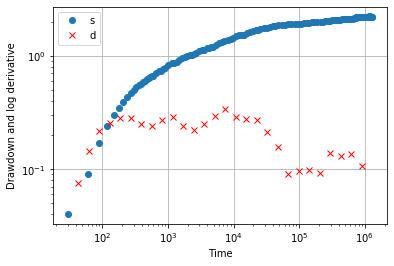

In [2]:
data = pd.read_csv('../data/thc_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data)
test.diagnostic()

## Model 

1) We initialize the Theis constant head boundary model with 0.030 m^3/s and radius of 20 m and show first the typecurve.

2) Then a first model parameter guess is done and showing the results with the trial function.


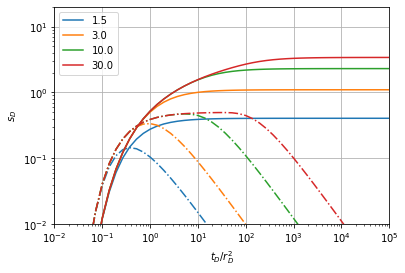

estimated parameter vector: [6.22576096e-01 4.76664633e+01 7.62562843e+04]


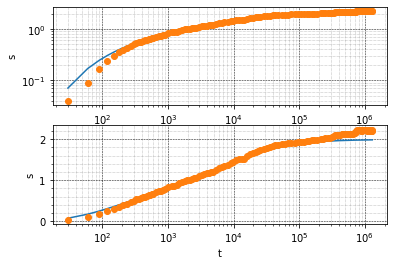

T =  0.008829470041817375 m2/s
S =  0.0023630138786012293 -
Ri =  799.9472518866424 m


In [3]:
model = ht.Theis_constanthead(Q=0.03,r=20, df=data)
model.plot_typecurve()
p = model.guess_params()
print("estimated parameter vector:",p)
model.trial()

Let use proceed with the automatic fit and directly report the results of the interpretation.

`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 1.0579e+00, final cost 9.9037e-02, first-order optimality 6.33e-08.


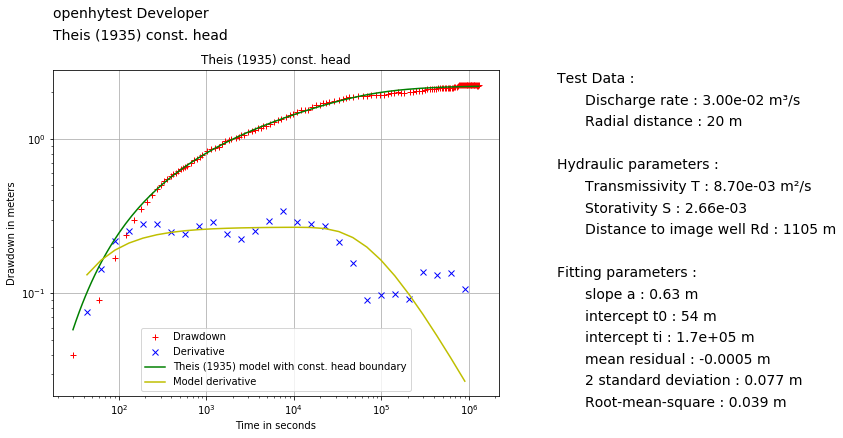

In [4]:
model.rpt(fitmethod='lm', ttle='Theis (1935) const. head', author='openhytest Developer', filetype='pdf', reptext='Report_Theis_consthead_example')

The estimated transmissivity is 8.7e-3 m2/s, the storativity is 2.7e-3, and the distance to the image well is 1105 m. These numbers are close to the estimation provided by de Marsily.

T  = 8.4 e-3 [m2/s]

S  = 2.8 e-3

ri = 1050 m

## Laplace inversion

First, let us try the laplace solution and inversion for the drawdown and the derivative.
Then we, compare the solution with the direct calculalted drawdown and derivative using mean residuals, standard deviation and RMS.

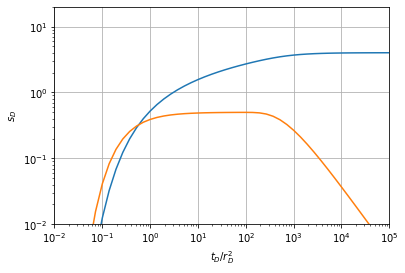

In [5]:
td = np.logspace(-2, 5)
sd = model._laplace_drawdown(td, inversion_option='dehoog')
plt.loglog(td, sd)
dd = model._laplace_drawdown_derivative(td, inversion_option='dehoog')
plt.loglog(td, dd)
plt.xlabel('$t_D / r_D^2$')
plt.ylabel('$s_D$')
plt.xlim((1e-2, 1e5))
plt.ylim((1e-2, 20))
plt.grid('True')

In [6]:
sd2 = model.dimensionless(td)
residual = sd-sd2

mr = np.mean(residual) #mean resiudal
print(mr)
sr = 2 * np.std(residual) #standard deviation
print(sr)
rms = np.sqrt(np.mean(residual**2))
print(rms)

4.197372077477464e-09
3.868972302073846e-08
1.979498924506281e-08


In [7]:
dd2 = model.dimensionless_logderivative(td)
residual2 = dd-dd2

mr2 = np.mean(residual2) #mean resiudal
print(mr2)
sr2 = 2 * np.std(residual2) #standard deviation
print(sr2)
rms2 = np.sqrt(np.mean(residual2**2))
print(rms2)

5.61095786835596e-10
5.52947752558759e-09
2.821100655506503e-09
